In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt

from scipy.fftpack import fft
from scipy import signal

Ganglion Channel Map

<img src="https://raw.githubusercontent.com/OpenBCI/Docs/master/assets/images/ganglion_10-20-positions.png" width="300">

## Data Preparation

In [2]:
colNames = ['timeStamp', 'c1' ,'c2', 'c3', 'c4', 'a1', 'a2', 'a3', 'ganglionTime']
data = pd.read_csv("../Data/OpenBCI-RAW-Right_arm_c3c4_2019-01-26_18-28-47.txt", sep=',', names=colNames)

In [3]:
data = data[6:]

In [4]:
data.head(5)

,timeStamp,c1,c2,c3,c4,a1,a2,a3,ganglionTime
6,0,-86.00,102.29,217.22,-3088.08,0.0,0.0,0.0,18:29:37.605
7,1,-116.97,104.64,222.32,-3133.10,0.0,0.0,0.0,18:29:37.620
8,2,-98.90,94.87,222.34,-3089.36,0.0,0.0,0.0,18:29:37.620
9,3,-84.23,87.45,209.79,-3019.86,0.0,0.0,0.0,18:29:37.635
10,4,-80.39,110.55,222.39,-3065.50,0.0,0.0,0.0,18:29:37.635


## Time Domain Analysis

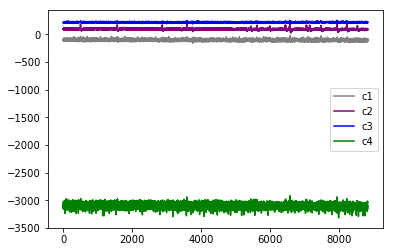

In [5]:
plt.plot(data['c1'],'grey')
plt.plot(data['c2'],'purple')
plt.plot(data['c3'],'blue')
plt.plot(data['c4'],'green')
plt.legend()

plt.show()

## Frequency Domain Analysis

In [6]:
# plt.plot(np.log(fft(sig[:20])))

In [7]:
data.shape

(8832, 9)

In [8]:
X = np.array(data.ix[250:, 1:5])
X.shape

/home/krohak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(8588, 4)

In [9]:
X

array([[  -79.56,   107.62,   228.97, -3058.27],
       [  -94.54,   104.78,   213.21, -3209.98],
       [ -123.  ,    89.11,   224.94, -3060.74],
       ..., 
       [ -131.4 ,    93.6 ,   226.59, -3153.33],
       [ -110.91,    81.55,   223.77, -3100.02],
       [  -76.67,    84.43,   213.  ,      nan]])

Estimate power spectral density using Welch’s method.

Welch’s method computes an estimate of the power spectral density by dividing the data into overlapping segments, computing a modified periodogram for each segment and averaging the periodograms.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html

In [10]:
freq, y = signal.welch(X.T, fs=200.0) 

In [11]:
y = y.T

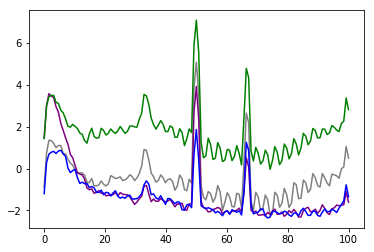

In [12]:
color = ['grey', 'purple', 'blue', 'green']
for i in range(y.shape[1]):
    _ = plt.plot(freq, np.log(y[:, i]), label='Channel {}'.format(i+1), c=color[i])

** Alpha waves!! ** 

## Spectrogram Analysis

In [13]:
data.shape

(8832, 9)

In [14]:
X = np.array(data.ix[250:, 1:5])
X.shape

(8588, 4)

In [15]:
sig = X[:, 0]

In [16]:
sig.shape

(8588,)

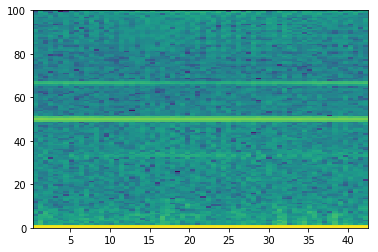

In [17]:
_ = plt.specgram(sig, NFFT=256, Fs=200.0)

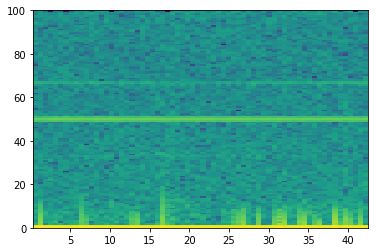

In [18]:
sig = X[:, 1]
_ = plt.specgram(sig, NFFT=256, Fs=200.0) # sampling rate is 200hz

In [19]:
# sig = X[:, 1]
# _ = plt.specgram(sig, NFFT=1024, Fs=200.0) # sampling rate is 200hz

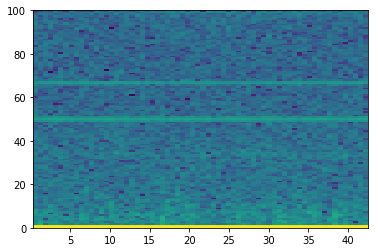

In [20]:
sig = X[:, 2]
_ = plt.specgram(sig, Fs=200.0)

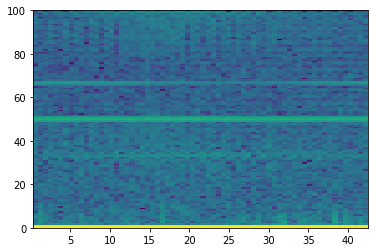

In [21]:
sig = X[:, 3]
_ = plt.specgram(sig, Fs=200.0)